In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [18]:
data = data.drop(columns=['Unnamed: 0'], axis= 1)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


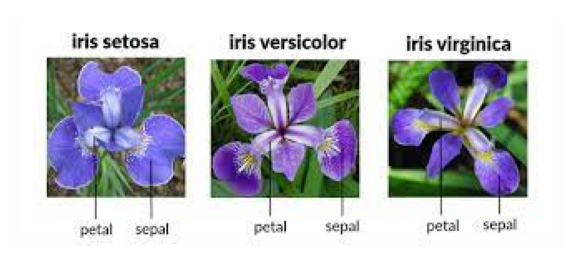

In [19]:
%matplotlib inline
img = mpimg.imread('download.jpeg')
plt.figure(figsize=(10,20))
plt.axis('off')
plt.imshow(img)

In [20]:
X = data.iloc[:,:4].values
y = data['Species'].values

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [22]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[-1.00251953,  1.01558317, -1.40470139, -1.20517074],
       [ 2.14105929, -0.11284257,  1.62373957,  1.19627649],
       [-0.88161265,  1.01558317, -1.34756099, -1.33858448],
       [ 0.20654925, -0.11284257,  0.59521245,  0.79603529],
       [ 0.56926988, -1.24126831,  0.70949324,  0.92944902],
       [-1.24433328,  0.11284257, -1.2332802 , -1.33858448],
       [-0.76070577,  0.78989802, -1.34756099, -1.33858448],
       [-0.15617138,  3.0467495 , -1.2904206 , -1.07175701],
       [-0.15617138, -0.56421287,  0.42379127,  0.12896661],
       [-0.88161265,  0.78989802, -1.2904206 , -1.33858448],
       [ 0.32745613, -0.11284257,  0.65235285,  0.79603529],
       [ 0.20654925, -0.78989802,  0.76663364,  0.52920782],
       [ 0.69017676, -0.56421287,  1.05233561,  1.32969023],
       [ 0.56926988, -0.56421287,  0.76663364,  0.39579408],
       [-0.88161265,  0.56421287, -1.1761398 , -0.93834327],
       [ 2.26196617,  1.69263861,  1.68087996,  1.32969023],
       [-1.12342641, -1.

In [24]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [26]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa']], dtype=object)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy : ",accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
Accuracy :  0.9333333333333333
